# Trabajo práctica n°1
Se realizará un EDA sobre el csv de properati, para preparar los datos para realizar luego un modelo de predicción de precios.
El Dataset se encuentra en: https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view?resourcekey=0-4m-28Uq6kWRDBrt2NXFbNQ

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos y primera visualización

In [2]:
# Agregar el archivo en la carpeta Data. Ya agregué en el .gitignore que no suba al repositorio nada de la carpeta esa.
location = 'Data/properati.csv'
data = pd.read_csv(location, index_col=0)

In [3]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


### Hago un info() para ver cantidad de valores faltantes, los tipos de datos y las columnas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [5]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


## value_counts() de las columnas

In [6]:
# Ejemplo de una descripción, para plantear futuros regex 
data['description'][0]

'2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [7]:
data['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

In [8]:
# Tipos de propiedades
data['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [9]:
data['state_name'].value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [10]:
# Cantidad de barrios
len(data.place_name.unique())

1061

In [11]:
data['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [12]:
data.geonames_id.value_counts()

3838574.0    8504
3860259.0    6606
3430863.0    6534
3430234.0    3279
3436077.0    2992
             ... 
3839107.0       1
3863890.0       1
3838859.0       1
3864851.0       1
3860197.0       1
Name: geonames_id, Length: 646, dtype: int64

In [13]:
data.floor.value_counts()

1.0      2080
2.0      1542
3.0       914
4.0       658
5.0       484
         ... 
124.0       1
691.0       1
205.0       1
302.0       1
30.0        1
Name: floor, Length: 182, dtype: int64

Primeras conclusiones y dudas:
- Sólo incluyen ventas.
- geonames_id corresponde al place_name (barrio?)?
- floor, no sabemos a que corresponde, puede ser cantidad de pisos, o en que piso se ubica
- Hay un par de currencies que no tienen sentido, ver
- 4 tipos de propiedades, considerar al analizar las demás columnas
- 

**Primeras impresiones de Alan:**  
- Algunos datos no pueden ser correctos (por ej el máx en lat y el mínimo en precio). Revisar datos incoherentes con los demás
- Ver correlación entre columnas, para ver si puede descartarse alguna rápidamente o unificar dos.
- Unificar un poco el tema de la moneda. Ideas:
    - Crear una columna de conversión pesos/dólares se pueda observar mejor la relación. Considerar después la correlación con la fecha capaz?
    - Definir si el precio que se quiere predecir es en dólares o en pesos (quizás depende de alquiler/compra?)
    - Analizar la columna precio. Esta es la crítica, ya que define en qué moneda se vende, pero creo que no sirve al tener dos escalas diferentes dentro (separar en dos?).  
    - *Duda:* En el modelo, reconocería los dos rangos al tener los dos valores posibles en la columna moneda? 
- Muchos datos faltantes, hay que decidir qué hacer. Ideas:
    - Ver de eliminarlos (faltan 3 datos de place_name) o los que le faltan precio/m2 y no se pueden calcular directo desde las otras columnas (si estimamos esto, estaríamos prediciendo por encima del modelo posterior)
    - Calcular desde otras columnas, como las equivalencias entre precios o quizás lat-lon considerando place_name
    - Considerar un valor único (por ej, expensas y piso serían 0 probablemente en los datos faltantes)
    - Usar la columna descripción o título para sacar los datos (por ej cantidad de dormitorios). regex?

**Puntos a considerar, sacados de la reunión:**
- Si es Casa o pH sería 0 de expensas. Sino, se puede estimar desde la descripción capaz?  

## Misceláneos

In [14]:
# Chequeo de los datos que tienen 5 como floor, para analizar que significa
data[data['floor'] == 5]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
83,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.954876705,-60.6518377614",-32.954877,-60.651838,...,55.0,NaN,NaN,5.0,2.0,NaN,http://www.properati.com.ar/15byz_venta_depart...,IDEAL INVERSORES o ESTUDIANTES APTA CREDITO An...,2 Dormitorios. Dorrego y Pellegrini,https://thumbs4.properati.com/5/6EjItxfpThdt-D...
502,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.0,NaN,NaN,NaN,...,270.0,2781.250000,3296.296296,5.0,NaN,NaN,http://www.properati.com.ar/15f0o_venta_depart...,Departamento 320m² con Cochera en Arenales 180...,Departamento 320m² con Dependencias en Arenale...,https://thumbs4.properati.com/5/IOt00YuutmxTA2...
766,sell,apartment,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3429617.0,NaN,NaN,NaN,...,105.0,2666.666667,2666.666667,5.0,4.0,NaN,http://www.properati.com.ar/15fxq_venta_depart...,"- EDIFICIO INTELIGENTE- Pisos Exclusivos, - Ha...",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/6/Z8rC9UUg4satiU...
868,sell,apartment,Saavedra,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,3429422.0,"-34.555898,-58.479251",-34.555898,-58.479251,...,41.0,NaN,2390.243902,5.0,2.0,NaN,http://www.properati.com.ar/15g9e_venta_depart...,Corredor Responsable: Raul Hector Merlo - CUCI...,MONOAMBIENTE BALCON APTO PROFESIONAL CON RENTA,https://thumbs4.properati.com/1/BSDYOGE3-BPZpq...
4752,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.431903,-58.585582",-34.431903,-58.585582,...,75.0,NaN,2133.333333,5.0,3.0,NaN,http://www.properati.com.ar/15nq4_venta_depart...,Corredor Responsable: Rene Alejandro Vera - CS...,TORRE JAI 3 AMB 2 baños con cochera,https://thumbs4.properati.com/4/SrHn7IoivQuYAg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119625,sell,apartment,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.518567,-58.474571",-34.518567,-58.474571,...,58.0,NaN,2756.896552,5.0,2.0,NaN,http://www.properati.com.ar/1cgx3_venta_depart...,Corredor Responsable: Luis Varela - CSI 5527 /...,OPORTUNIDAD 2 AMBIENTES A ESTRENAR - EDIFICIO ...,https://thumbs4.properati.com/6/8BQJzwL2OP3vy-...
119654,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6031,-58.401046",-34.603100,-58.401046,...,36.0,NaN,1527.777778,5.0,2.0,NaN,http://www.properati.com.ar/1cgyb_venta_depart...,Corredor Responsable: Luis Roman Garcia - C.U....,Venta 2 ambientes amplio buen estado luminoso,https://thumbs4.properati.com/7/QY4RjJpJOS8KB9...
119785,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.554184,-58.436424",-34.554184,-58.436424,...,40.0,NaN,4250.000000,5.0,1.0,NaN,http://www.properati.com.ar/1ch34_venta_depart...,Corredor Responsable: OSCAR N. LIBERMAN - CUCI...,Imperdible Monoambiente en La Pampa y Castañeda,https://thumbs4.properati.com/4/siiS87KRd-EOjk...
119824,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.6003087,-58.4044663",-34.600309,-58.404466,...,107.0,2336.448598,2336.448598,5.0,NaN,7000.0,http://www.properati.com.ar/1ch5q_venta_depart...,OPERACION: VENTA TIPO DE PROPIEDAD: DEPARTAMEN...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/4/c7f13kJ_3FlCsA...


In [15]:
#Chequeo de los pH que pisos tienen (se puede cambiar el último loc para ver los otros tres tipos de propiedad). 'apartment', 'house', 'store'
data.groupby(['property_type'])['floor'].value_counts().loc['PH']

floor
1.0     154
2.0     146
3.0      63
6.0      42
5.0      38
4.0      31
7.0      31
8.0      12
9.0      11
11.0     10
10.0      9
12.0      8
13.0      7
14.0      7
16.0      2
15.0      1
17.0      1
Name: floor, dtype: int64

## Chequeo de filas duplicadas
Sólo chequee que sean duplicadas completas, no por ejemplo un análisis más profundo para ver si se repite la misma casa

In [16]:
data.duplicated().sum()

0

## Gráficos

<AxesSubplot:>

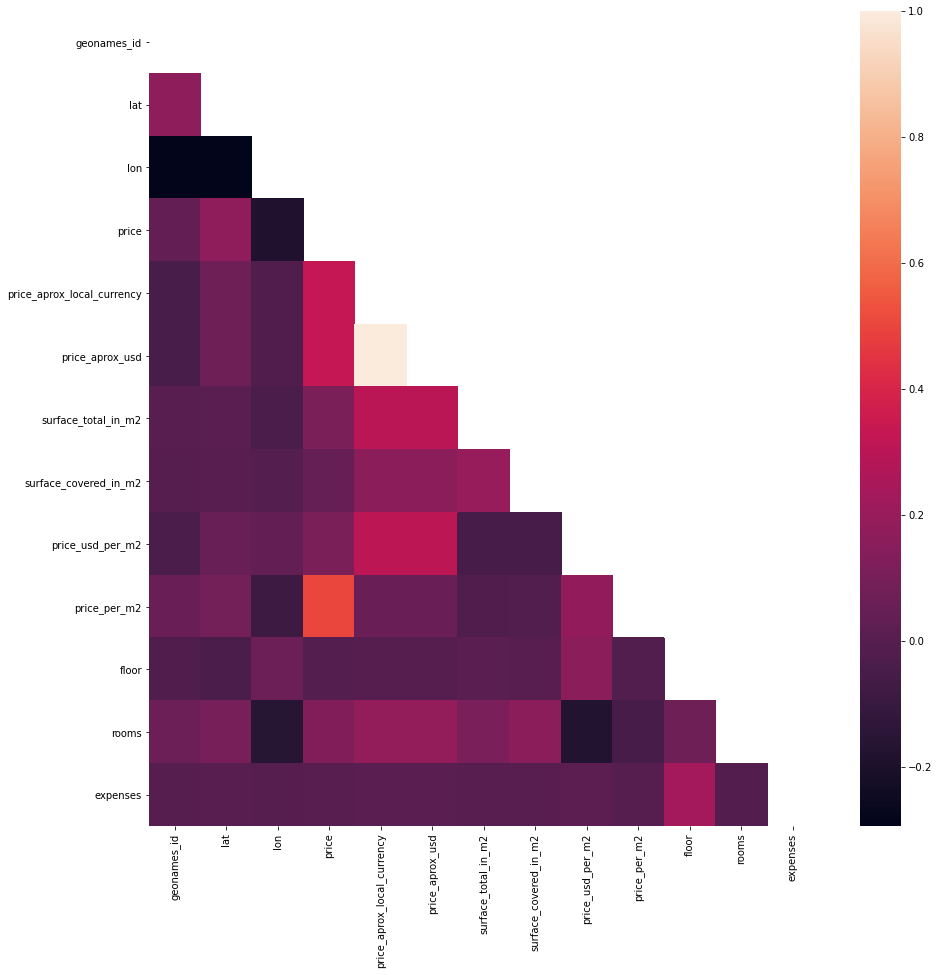

In [17]:
plt.figure(figsize=(15,15))
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr , mask=mask)

<AxesSubplot:ylabel='price'>

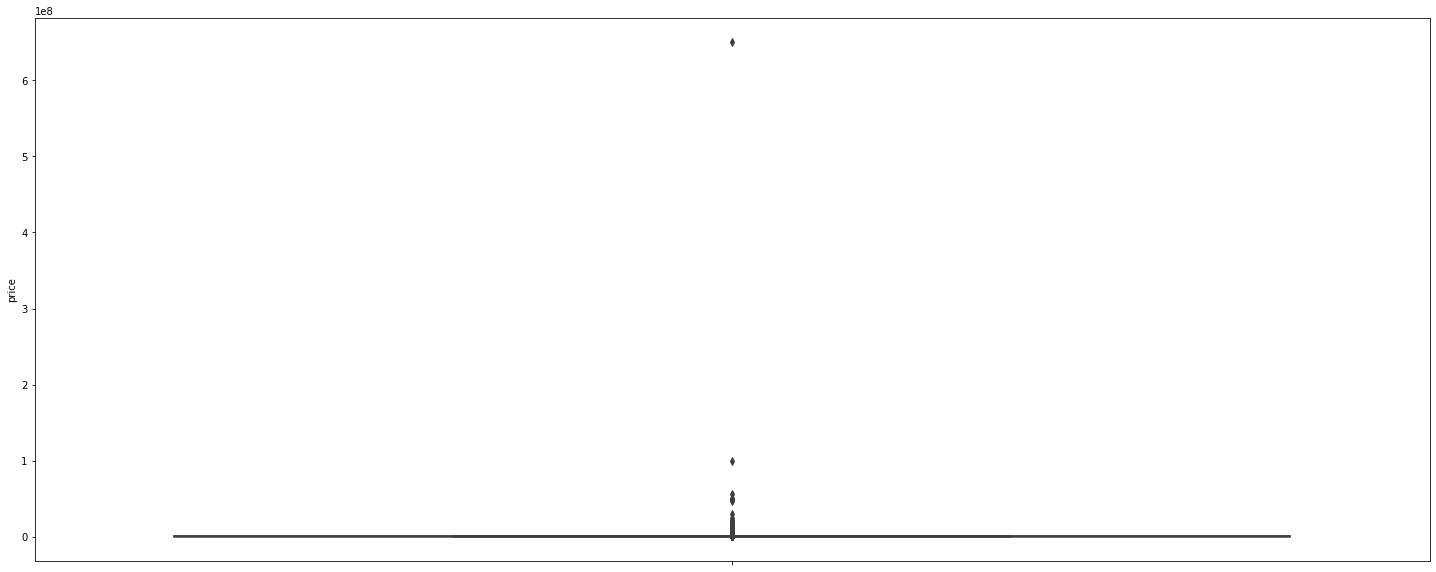

In [18]:
# Este lo hice así nomás, es horrible
plt.figure(figsize=(25,10))
sns.boxplot(y='price', data=data)